In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常表示负号

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100, 默认为50
pd.set_option('max_colwidth', 100)
# 设置1000列时才换行
pd.set_option('display.width', 1000)

train = pd.read_csv('datasets/train.csv')

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


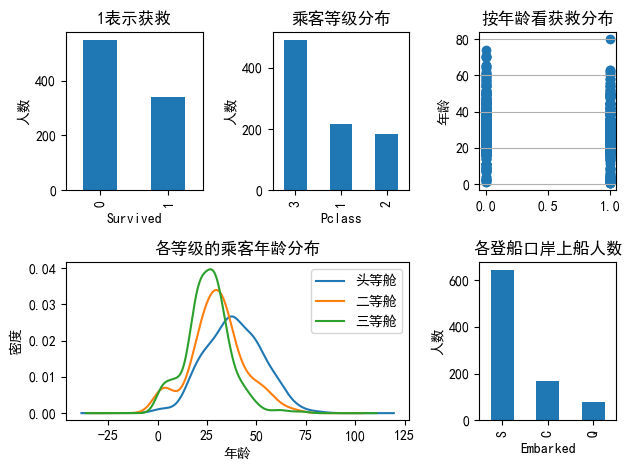

In [33]:
fig = plt.figure()  # 创建一个图形对象
fig.set(alpha=0.5)  # 设置透明度为0.5

# 在一张大图中分列几个小图
plt.subplot2grid((2, 3), (0, 0))
train.Survived.value_counts().plot(kind='bar')  # 柱状图
plt.title(u'1表示获救')
plt.ylabel(u'人数')

plt.subplot2grid((2, 3), (0, 1))
train.Pclass.value_counts().plot(kind='bar')
plt.title(u'乘客等级分布')
plt.ylabel(u'人数')

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(train.Survived, train.Age)  # 绘制散点图
plt.ylabel(u'年龄')
plt.grid(which='major', axis='y')  # grid添加网格线
# which='major': 指定要添加的网格线的类型. 'major' 表示添加主刻度网格线
plt.title(u'按年龄看获救分布')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
# KDE(Kernel Density Estimation, 核密度估计), 是一种非参数的方式, 用于估计随机变量的概率密度函数
# 它通过对数据点进行平滑处理，生成连续的密度曲线,便于可视化和分析数据分布。
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'年龄')
plt.ylabel(u'密度')
plt.title(u'各等级的乘客年龄分布')
plt.legend((u'头等舱', u'二等舱', u'三等舱'), loc='best')
# 添加图例, 标识不同舱位的 KDE 曲线, 位置选择最佳。

plt.subplot2grid((2, 3), (1, 2))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u'各登船口岸上船人数')
plt.ylabel(u'人数')

# fig.tight_layout(pad=0.4, w_pad=0, h_pad=0)
fig.tight_layout()
plt.show()

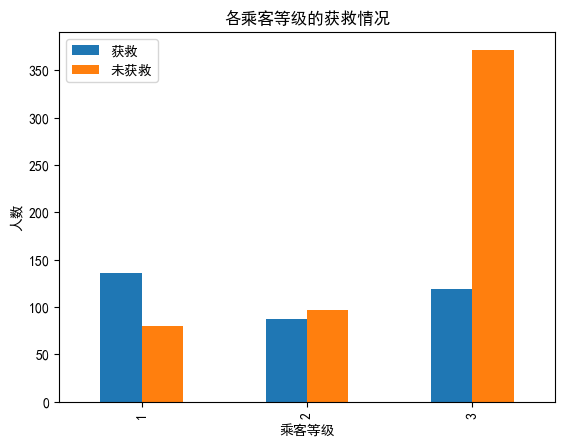

In [4]:
# 舱位等级与获救情况

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=False)
# stacked=True 表示绘制堆叠柱状图, 每个柱子显示不同乘客等级的获救和未获救人数
# 获救人数在柱子的上半部分，未获救人数在下半部分。
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

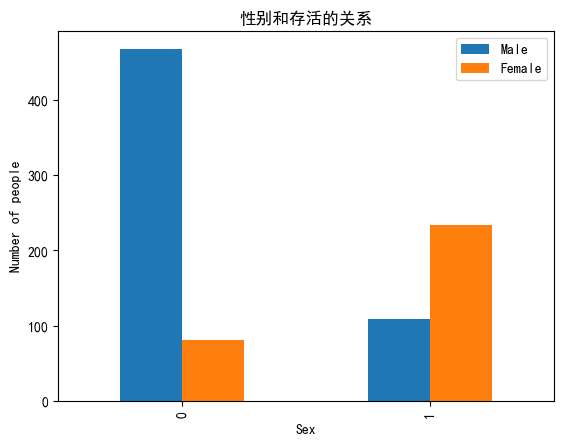

In [5]:
# 性别与获救情况
Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df = pd.DataFrame({'Male': Survived_m, 'Female': Survived_f})
df.plot(kind='bar', stacked=False)
plt.title(u'性别和存活的关系')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

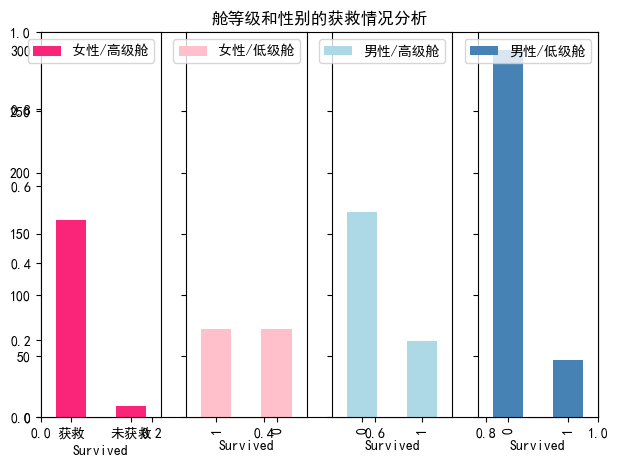

In [6]:
# 舱位等级和性别对获救影响的详细分析

fig = plt.figure()
fig.set(alpha=0.5)

plt.title(u'舱等级和性别的获救情况分析')

ax1 = fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label='female high class', color='#FA2479')
ax1.set_xticklabels([u'获救', u'未获救'], rotation=0)
plt.legend([u'女性/高级舱'], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female low class', color='pink')
plt.legend([u'女性/低级舱'], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male high class', color='lightblue')
plt.legend([u'男性/高级舱'], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
plt.legend([u'男性/低级舱'], loc='best')

fig.tight_layout(pad=0.4, w_pad=0, h_pad=0)
plt.show()

<Figure size 640x480 with 0 Axes>

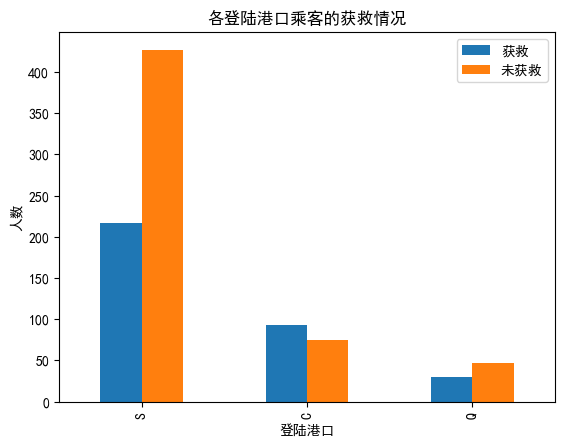

In [7]:
# 登船港口与获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救': Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=False)
plt.title(u'各登陆港口乘客的获救情况')
plt.xlabel(u'登陆港口')
plt.ylabel(u'人数')

plt.show()

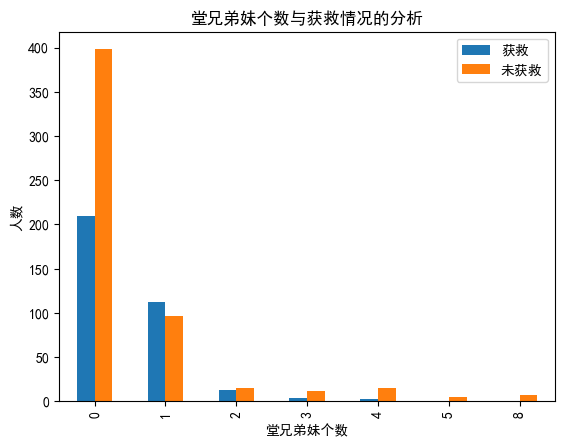

In [8]:
# 堂兄弟妹个数与获救情况的分析

Survived_0 = train.SibSp[train.Survived == 0].value_counts()
Survived_1 = train.SibSp[train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救': Survived_1, u'未获救': Survived_0})
df.plot(kind='bar')
plt.title(u'堂兄弟妹个数与获救情况的分析')
plt.xlabel(u'堂兄弟妹个数')
plt.ylabel(u'人数')

plt.show()

<Figure size 640x480 with 0 Axes>

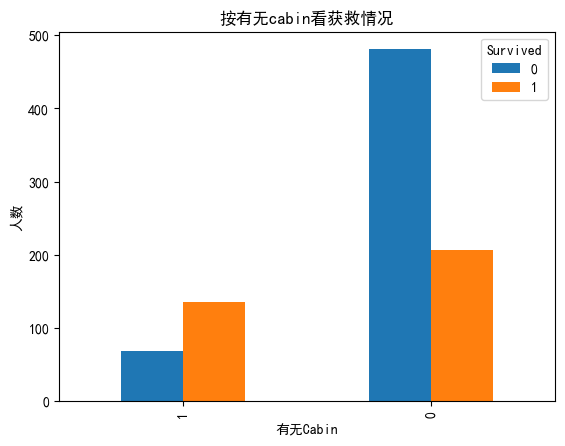

In [9]:
# 按有无cabin看获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df = pd.DataFrame({'1': Survived_cabin, '0': Survived_nocabin}).transpose()
df.plot(kind='bar')
plt.title(u'按有无cabin看获救情况')
plt.xlabel(u'有无Cabin')
plt.ylabel(u'人数')

plt.show()

通常遇到缺值的情况，我们会有几种常见的处理方式

1. 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了

2. 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中

3. 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。

4. 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。

这里先尝试拟合补全：
使用scikit-learn中的RandomForest来拟合缺失的年龄数据（RandomForest是一个用在原始数据中做不同采样，建立多棵DecisionTree，再进行average等来降低过拟合现象，提高结果的机器学习算法。

In [10]:
# 使用随机森林拟合缺失数据
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进RandomForestRegressor
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()]  # .values 是将 Pandas DataFrame 转换为 NumPy 数组
    unknown_age = age_df[age_df.Age.isnull()]
    
    x_known = known_age[['Fare', 'Parch', 'SibSp', 'Pclass']].values   # Age列
    y_known = known_age['Age'].values  # 其他数值型特征列
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    # 创建一个随机森林回归模型 rfr，设置随机种子为 0、使用 2000 棵树，并并行运行 n_jobs=-1 表示使用所有可用的 CPU 核心
    rfr.fit(x_known, y_known)
    # 使用已知年龄和对应的特征拟合模型
    
    # 用得到的模型来进行未知年龄结果预测
    x_unknown = unknown_age[['Fare', 'Parch', 'SibSp', 'Pclass']].values
    pred_age = rfr.predict(x_unknown)
    df.loc[(df.Age.isnull(), 'Age')] = pred_age
    # (df.Age.isnull(), 'Age'): 这个元组表示在 df 中进行索引，选择所有 Age 列缺失的行，并指定要更新的列为 'Age'
    
    return df

train = pd.read_csv('datasets/train.csv')
train = set_missing_ages(train)
print(train)

     PassengerId  Survived  Pclass                                                                                Name     Sex        Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1      0              113

In [11]:
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df
    
train = set_cabin_type(train)
# print(train)
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')
# prefix指定生成的虚拟变量的前缀, 如Cabin_Yes, Cabin_No
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)  # inplace=True表示在原df上执行
print(df)

     PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0              1         0  22.000000      1      0    7.2500      True      False       False       False        True       False      True     False     False      True
1              2         1  38.000000      1      0   71.2833     False       True        True       False       False        True     False      True     False     False
2              3         1  26.000000      0      0    7.9250      True      False       False       False        True        True     False     False     False      True
3              4         1  35.000000      1      0   53.1000     False       True       False       False        True        True     False      True     False     False
4              5         0  35.000000      0      0    8.0500      True      False       False       False        True       False      True     

In [12]:
# 发现Age和Fare这两个属性乘客的数值幅度拜年话非常大(各属性值之间的scale差距太大会极大地影响收敛速度甚至不收敛)
# 所以先用sklearn中的preprocessing模块对这两个属性做一个scaling(也就是将一些变化幅度大的特征化到[-1,1]内)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
# fit_transform 方法要求输入的数据必须是二维数组（即一个 DataFrame 或一个二维 NumPy 数组）
# 而 df[['Age']] 以 DataFrame 的形式返回，具有形状 (n_samples, 1)，而 df['Age'] 返回的是一个一维 Series，形状为 (n_samples,)
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

print(df)

     PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0              1         0  22.000000      1      0    7.2500      True      False       False       False        True       False      True     False     False      True   -0.561377    -0.502445
1              2         1  38.000000      1      0   71.2833     False       True        True       False       False        True     False      True     False     False    0.613173     0.786845
2              3         1  26.000000      0      0    7.9250      True      False       False       False        True        True     False     False     False      True   -0.267740    -0.488854
3              4         1  35.000000      1      0   53.1000     False       True       False       False        True        True     False      True     False     False    0.392945     0.420730
4              5    

In [13]:
# 逻辑回归建模
# 我们把需要的字段取出来, 转成numpy格式, 使用sklearn中的LogisticRegression建模
from sklearn import linear_model

# 用正则表达式取出我们要的属性值, Age_.*中, Age_匹配以Age_开头的列名, '.*'表示可以跟随任意字符
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

cols = train_df.columns
y = train_np[:, 0]  # y即Survival结果

X = train_np[:, 1:]  # X即特征属性值

# fit到 RandomForestRegression 之中, clf(classifier)
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
# C=1.0: 正则化强度的倒数. 较小的值会增强正则化, 默认值为 1.0
# 使用 L1 正则化，这可以产生稀疏模型（即许多特征系数为 0）
# tol=1e-6: 收敛的容忍度，即模型训练停止的条件
# solver='liblinear': 使用 Liblinear 求解器，适合小规模数据集。
clf.fit(X, y.astype('int'))

print(clf)

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)


在初始化 LogisticRegression 时，可以设置多个参数：

- C:
正则化强度的倒数。较小的值会增强正则化，默认值为 1.0。正则化可以防止模型过拟合。

- penalty:
指定使用的正则化类型。常用选项包括：
'l1': L1 正则化（也称为 Lasso），可以导致稀疏解（一些特征系数为 0）。
'l2': L2 正则化（也称为 Ridge），更常用的选择。

- tol:
收敛的容忍度，模型训练停止的条件。默认值为 1e-4。

- solver:
指定优化算法。常用的选项包括：
'liblinear': 适合小型数据集，支持 L1 和 L2 正则化。
'lbfgs': 适合大型数据集，只支持 L2 正则化。
'saga': 适合大规模数据集，支持 L1 和 L2 正则化。

- max_iter:
最大迭代次数，用于求解器收敛的条件，默认值为 100。

In [14]:
# test也要和train一样地预处理！
test = pd.read_csv('datasets/test.csv')
test.loc[(test.Fare.isnull()), 'Fare'] = 0
test = set_missing_ages(test)
test = set_cabin_type(test)
# print(test)
dummies_Cabin = pd.get_dummies(test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(test['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(test['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(test['Pclass'], prefix='Pclass')
df_test = pd.concat([test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

scaler = preprocessing.StandardScaler()
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])

print(df_test)

     PassengerId        Age  SibSp  Parch      Fare  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  Age_scaled  Fare_scaled
0            892  34.500000      0      0    7.8292      True      False       False        True       False       False      True     False     False      True    0.367102    -0.496637
1            893  47.000000      1      0    7.0000      True      False       False       False        True        True     False     False     False      True    1.331237    -0.511497
2            894  62.000000      0      0    9.6875      True      False       False        True       False       False      True     False      True     False    2.488198    -0.463335
3            895  27.000000      0      0    8.6625      True      False       False       False        True       False      True     False     False      True   -0.211379    -0.481704
4            896  22.000000      1      1   12.2875      True      Fal

In [15]:
import numpy as np

# 预测结果
test_end = df_test.filter(regex='Age._*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# print(test_end.info())
pred = clf.predict(test_end.values)
result = pd.DataFrame({'PassengerID': test['PassengerId'].values, 'Survived': pred.astype(np.int32)})
result.to_csv('result/baseline.csv', index=False)
print('OK!!!')

OK!!!


# 逻辑回归系统优化！

In [16]:
# clf.coef_  (coefficient), T是转置
# 这是逻辑回归模型训练后的系数数组. 它的形状通常是 (1, n_features), 表示每个特征的权重. 每个系数代表该特征对预测结果的影响程度。
print(pd.DataFrame({'columns':list(train_df.columns)[1:], 'coef':list(clf.coef_.T)}))

        columns                    coef
0         SibSp   [-0.3442334950641485]
1         Parch  [-0.10491795486904935]
2      Cabin_No                   [0.0]
3     Cabin_Yes    [0.9020902991555577]
4    Embarked_C                   [0.0]
5    Embarked_Q                   [0.0]
6    Embarked_S  [-0.41726066958678093]
7    Sex_female    [1.9565683899111859]
8      Sex_male   [-0.6774192985407235]
9      Pclass_1    [0.3411672835953196]
10     Pclass_2                   [0.0]
11     Pclass_3   [-1.1941317959892375]
12   Age_scaled    [-0.523762740036645]
13  Fare_scaled   [0.08443598495747505]


我们先看看那些权重绝对值非常大的feature，在我们的模型上：

Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。

Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。

有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)

Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）

有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。

船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

## 交叉验证！

In [17]:
from sklearn.model_selection import cross_val_score  # 交叉验证

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:, 1:]
y = all_data.values[:, 0]

# cv是交叉验证次数 (Cross Validation)
print(cross_val_score(clf, X, y.astype('int'), cv=5))

[0.81564246 0.80898876 0.78651685 0.78651685 0.81460674]


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin_No     891 non-null    bool   
 7   Cabin_Yes    891 non-null    bool   
 8   Embarked_C   891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Sex_female   891 non-null    bool   
 12  Sex_male     891 non-null    bool   
 13  Pclass_1     891 non-null    bool   
 14  Pclass_2     891 non-null    bool   
 15  Pclass_3     891 non-null    bool   
 16  Age_scaled   891 non-null    float64
 17  Fare_scaled  891 non-null    float64
dtypes: bool(10), float64(4), int64(4)
memory usage: 64

既然要做交叉验证, 那干脆先把交叉验证里面的bad case拿出来人眼审核, 看能否发现我们忽略了哪些信息, 使得这些乘客被误判了
再把bad case上得到的想法和之前系数分析的合在一起, 然后逐个试试

In [19]:
from sklearn.model_selection import train_test_split
# 分割数据, 按照 训练数据:cv数据 = 7:3 的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(train_df.values[:, 1:], train_df.values[:, 0].astype('int'))

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:, 1:])

origin_data_train = pd.read_csv('datasets/train.csv')
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin\
                                    (split_cv[predictions != cv_df.values[:, 0]]['PassengerId'].values)]
print(bad_cases)

     PassengerId  Survived  Pclass                                                     Name     Sex    Age  SibSp  Parch             Ticket      Fare    Cabin Embarked
14            15         0       3                     Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0             350406    7.8542      NaN        S
49            50         0       3            Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.00      1      0             349237   17.8000      NaN        S
55            56         1       1                                        Woolner, Mr. Hugh    male    NaN      0      0              19947   35.5000      C52        S
65            66         1       3                                 Moubarek, Master. Gerios    male    NaN      1      1               2661   15.2458      NaN        C
68            69         1       3                          Andersson, Miss. Erna Alexandra  female  17.00      4      2            3101281    7.9250      NaN  

### 一些可能可以做的优化
1. Age属性不使用现在的拟合方式，而是根据名称中的'Mr', 'Mrs', 'Miss'等的平均值进行填充
2. Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature
3. Cabin再细化一点，对于有记录的Cabin属性，我们将其分为前面的字母部分（位置和船层？）和后面的数字部分（房间号？）（观看原始数据，会发现这个数值大的情况下，似乎获救的可能性更高）
4. Pclass和Sex太重要了，试着用它们去组合一个组合属性来试试，这也是另外一种程度的细化
5. 单加一个Child字段，Age<=12的，设为1（小朋友优先程度高）
6. 如果名字里有'Mrs'，而Parch>1的，她可能是一个母亲，应该获救的概率也会提高，因此可以增加一个Mother字段
7. 登船港口可以考虑先去掉？Q、C没权重，S很诡异
8. 把堂兄弟/兄妹和Parch还有自己的个数加在一起组一个Family_size字段（大家族可能会有影响）
9. Name是一个我们已知没有触碰的属性，可以做一些简单的处理，比如说男性中带某些字眼的（如'Capt'、'Don'、'Major'、'Sir'）可以统一到一个title，女性也是


## 学习曲线

### - 欠拟合：需要更多的feature、更复杂的模型来提高准确度
### - 过拟合：feature selection，挑出较好的feature的subset来做training；提供更多的数据弥补原始数据的bias问题

In [20]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出数据在某模型上的学习曲线。

    参数解释:
    ---------------
    :param estimator: 使用的分类器或回归器模型
    :param title: 图表的标题
    :param X: 输入的特征数据 (numpy数组)
    :param y: 目标变量
    :param ylim: 元组格式 (y_min, y_max), 用于设定图像中纵坐标的范围
    :param cv: 交叉验证时数据分成的份数 (默认值为3)
    :param n_jobs: 并行任务数
    :param train_sizes: 训练集的样本比例，默认是从5%到100%的20个等间隔点
    :param verbose: 控制输出信息的详细程度, verbose=0 表示无输出, 数字越大, 输出越详细
    :param plot: 是否绘制图像，默认为True

    返回:
    ---------------
    :return midpoint: 训练集和测试集最后一批得分的中点
    :return diff: 训练集和测试集最后一批得分的差异
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes, verbose=verbose)
    """
    train_sizes：返回不同训练样本的数量，对应于 train_sizes 参数。它可能会略微调整为实际可以用于训练的样本数。
    train_scores：每个训练集大小下的训练集得分，形状是 (len(train_sizes), cv)，表示每个训练集大小下进行 cv 次交叉验证的结果。
    test_scores：每个训练集大小下的测试集得分，形状与 train_scores 类似，也是 (len(train_sizes), cv)，表示每个训练集大小下在交叉验证集上的表现。
    """
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)  # *ylim 是解包操作，相当于传递两个值给 plt.ylim()
        plt.xlabel(u'训练样本数')
        plt.ylabel(u'得分')
        # plt.gca()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color='b')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha =0.1, color='r')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label=u'训练集上得分')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label=u'交叉验证集上得分')
        
        plt.legend(loc='best')
        
        # plt.draw()
        plt.show()
        # plt.gca()
    
    # 计算最后一个训练样本点的中点和差异
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    # 训练集上界和测试集下界的均值
    
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    # 训练集上界和测试集下界的差异
    return midpoint, diff
            

In [21]:
def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    
    x_known = known_age[['Fare', 'Parch', 'SibSp', 'Pclass']].values
    y_known = known_age['Age'].values
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x_known, y_known)
    
    x_unknown = unknown_age[['Fare', 'Parch', 'SibSp', 'Pclass']].values
    pred_ages = rfr.predict(x_unknown)
    df.loc[(df.Age.isnull()), 'Age'] = pred_ages
    
    return df

In [22]:
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

In [23]:
train = pd.read_csv('datasets/train.csv')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [24]:
train = set_missing_ages(train)
train = set_cabin_type(train)
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(train['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(train['Pclass'], prefix = 'Pclass')



In [25]:

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

y = train_np[:, 0]
X = train_np[:, 1:]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin_No     891 non-null    bool   
 7   Cabin_Yes    891 non-null    bool   
 8   Embarked_C   891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Sex_female   891 non-null    bool   
 12  Sex_male     891 non-null    bool   
 13  Pclass_1     891 non-null    bool   
 14  Pclass_2     891 non-null    bool   
 15  Pclass_3     891 non-null    bool   
 16  Age_scaled   891 non-null    float64
 17  Fare_scaled  891 non-null    float64
dtypes: bool(10), float64(4), int64(4)
memory usage: 64

In [26]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   SibSp        891 non-null    int64  
 2   Parch        891 non-null    int64  
 3   Cabin_No     891 non-null    bool   
 4   Cabin_Yes    891 non-null    bool   
 5   Embarked_C   891 non-null    bool   
 6   Embarked_Q   891 non-null    bool   
 7   Embarked_S   891 non-null    bool   
 8   Sex_female   891 non-null    bool   
 9   Sex_male     891 non-null    bool   
 10  Pclass_1     891 non-null    bool   
 11  Pclass_2     891 non-null    bool   
 12  Pclass_3     891 non-null    bool   
 13  Age_scaled   891 non-null    float64
 14  Fare_scaled  891 non-null    float64
dtypes: bool(10), float64(2), int64(3)
memory usage: 43.6 KB
None


In [27]:
print(pd.DataFrame(X).info())
print(pd.DataFrame(y).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       891 non-null    object
 1   1       891 non-null    object
 2   2       891 non-null    object
 3   3       891 non-null    object
 4   4       891 non-null    object
 5   5       891 non-null    object
 6   6       891 non-null    object
 7   7       891 non-null    object
 8   8       891 non-null    object
 9   9       891 non-null    object
 10  10      891 non-null    object
 11  11      891 non-null    object
 12  12      891 non-null    object
 13  13      891 non-null    object
dtypes: object(14)
memory usage: 97.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None


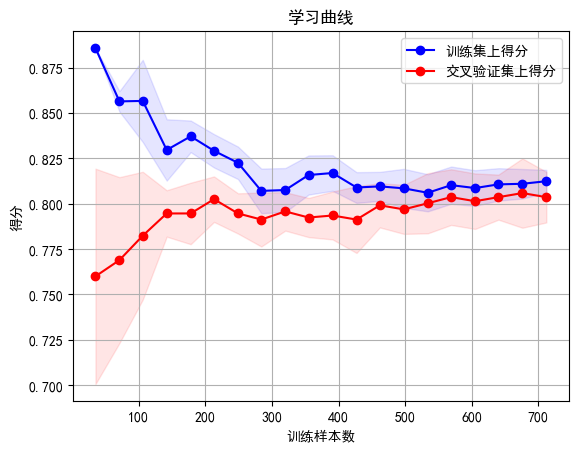

(0.8041289762608517, 0.028972978630723678)

In [28]:
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X, y.astype('int'))

plot_learning_curve(clf, u'学习曲线', X, y.astype('int'))

In [29]:
print(cols)

Index(['Survived', 'SibSp', 'Parch', 'Cabin_No', 'Cabin_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_scaled', 'Fare_scaled'], dtype='object')


### 模型融合

In [30]:
# Bagging
from sklearn.ensemble import BaggingRegressor

# n_estimators: 要继承的基估计器个数, max_samples决定抽取去训练基估计器的样本数量, max_features决定去训练基估计器的特征数量
# bootstrap: bool, 可选(默认True) 决定样本子集的抽样方式(放回/不放回)
# bootstrap_feature: bool, 可选(默认False) 决定特征子集的抽样方式(放回/不放回)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True,
                               bootstrap_features=False, n_jobs=-1)
# y = train_np[:, 0]
# X = train_np[:, 1:]
X = pd.DataFrame(X, columns=cols[1:])
bagging_clf.fit(X, y.astype('int'))

test_end = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
pred = bagging_clf.predict(test_end)
result = pd.DataFrame({'PassengerId': test['PassengerId'].values, 'Survived': pred.astype(np.int32)})
result.to_csv('result/bagging_pred.csv', index=False)
print('OK!!!')

OK!!!
